# **Binary Classification**  

### Classify data set A1 using four classifiers: k-NN, Support Vector Machine (with rbf kernel), Naïve Bayes Classifier, and Decision Tree. The objective is to experiment with parameter selection in training classifiers and to compare the performance of these well-known classification methods. 

In [25]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from statistics import mean, stdev
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm 

In [26]:
# Loading DataA1
DataA1 = pd.read_csv('DataA1.csv',encoding='latin-1')
DataA1.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Label
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


In [27]:
#Print the columns
print(DataA1.columns)

Index(['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6',
       'Feature7', 'Feature8', 'Feature9', 'Feature10', 'Feature11',
       'Feature12', 'Feature13', 'Feature14', 'Feature15', 'Feature16',
       'Feature17', 'Feature18', 'Feature19', 'Feature20', 'Feature21',
       'Feature22', 'Feature23', 'Feature24', 'Feature25', 'Feature26',
       'Feature27', 'Feature28', 'Feature29', 'Feature30', 'Feature31',
       'Feature32', 'Feature33', 'Feature34', 'Feature35', 'Feature36',
       'Feature37', 'Feature38', 'Feature39', 'Feature40', 'Feature41',
       'Feature42', 'Feature43', 'Feature44', 'Feature45', 'Feature46',
       'Feature47', 'Feature48', 'Feature49', 'Feature50', 'Feature51',
       'Feature52', 'Feature53', 'Feature54', 'Feature55', 'Feature56',
       'Feature57', 'Label'],
      dtype='object')


In [28]:
#Get the shape of the dataset
DataA1.shape

(2200, 58)

In [29]:
 #Get top 5 rows of the dataset
DataA1.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57,Label
0,1,2,1,2,1,2,3,3,3,3,...,3,2,3,4,2,2,2,2,1,1
1,3,3,4,2,1,2,2,4,3,2,...,1,4,3,4,4,4,1,3,4,1
2,4,1,4,4,4,4,1,1,2,1,...,1,2,1,1,4,2,2,4,4,1
3,1,4,1,1,3,3,4,4,3,4,...,1,3,3,4,1,3,3,4,2,-1
4,3,4,4,3,1,1,4,4,4,1,...,3,1,3,2,1,4,2,1,1,-1


In [30]:
# Knowing the dataset
# Checking the non-null and null values for each columns
DataA1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 58 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Feature1   2200 non-null   int64
 1   Feature2   2200 non-null   int64
 2   Feature3   2200 non-null   int64
 3   Feature4   2200 non-null   int64
 4   Feature5   2200 non-null   int64
 5   Feature6   2200 non-null   int64
 6   Feature7   2200 non-null   int64
 7   Feature8   2200 non-null   int64
 8   Feature9   2200 non-null   int64
 9   Feature10  2200 non-null   int64
 10  Feature11  2200 non-null   int64
 11  Feature12  2200 non-null   int64
 12  Feature13  2200 non-null   int64
 13  Feature14  2200 non-null   int64
 14  Feature15  2200 non-null   int64
 15  Feature16  2200 non-null   int64
 16  Feature17  2200 non-null   int64
 17  Feature18  2200 non-null   int64
 18  Feature19  2200 non-null   int64
 19  Feature20  2200 non-null   int64
 20  Feature21  2200 non-null   int64
 21  Feature22  220

In [31]:
# Separating features and Target Attribute (Label)
x = DataA1.drop(columns=['Label'])
y = DataA1['Label']
x.head()


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature48,Feature49,Feature50,Feature51,Feature52,Feature53,Feature54,Feature55,Feature56,Feature57
0,1,2,1,2,1,2,3,3,3,3,...,4,3,2,3,4,2,2,2,2,1
1,3,3,4,2,1,2,2,4,3,2,...,3,1,4,3,4,4,4,1,3,4
2,4,1,4,4,4,4,1,1,2,1,...,1,1,2,1,1,4,2,2,4,4
3,1,4,1,1,3,3,4,4,3,4,...,2,1,3,3,4,1,3,3,4,2
4,3,4,4,3,1,1,4,4,4,1,...,4,3,1,3,2,1,4,2,1,1


In [32]:
y.head()

0    1
1    1
2    1
3   -1
4   -1
Name: Label, dtype: int64

In [33]:
# Z-score normalization
scaler = StandardScaler()
normalised_x = scaler.fit_transform(x)
np.array(normalised_x)

array([[-1.35289759, -0.48747864, -1.37244139, ..., -0.4584159 ,
        -0.41756618, -1.39224875],
       [ 0.45920268,  0.43308188,  1.36002111, ..., -1.37441497,
         0.49741947,  1.36965138],
       [ 1.36525282, -1.40803915,  1.36002111, ..., -0.4584159 ,
         1.41240513,  1.36965138],
       ...,
       [ 0.45920268,  1.35364239,  1.36002111, ...,  0.45758317,
        -1.33255183, -0.47161537],
       [-1.35289759,  1.35364239,  0.44920027, ...,  1.37358225,
         0.49741947,  1.36965138],
       [ 1.36525282,  0.43308188, -1.37244139, ..., -0.4584159 ,
         1.41240513,  0.44901801]])

In [34]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(normalised_x, y, test_size=0.3, random_state=42)
np.array(x_train).shape

(1540, 57)

In [35]:
np.array(x_test).shape

(660, 57)

In [36]:
np.array(y_train).shape

(1540,)

In [37]:
np.array(y_test).shape

(660,)

##### 2.	Use 5-fold cross validation on the training set to select the parameters k for k-NN from the set [1, 3, 5, 7, ..., 31]. Plot a figure that shows the relationship between the accuracy and the parameter k. Report the best k in terms of classification accuracy. 

In [38]:
# Possible Values for k
k = np.arange(1, 32, 2)
print("k values: \n",k)

# Perform 5-fold cross-validation to select k
cross_validation_scores = []
for k_value in k:
    K_nearest_neighbour = KNeighborsClassifier(n_neighbors=k_value)
    validation_scores = cross_val_score(K_nearest_neighbour, x_train, y_train, cv = 5, scoring='accuracy')

    cross_validation_scores.append(validation_scores.mean())

    print("k value:",k_value,"\nAccuracy Scores", validation_scores, "\nMean Value of Accuracy: ", validation_scores.mean(),"\n")

k values: 
 [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31]
k value: 1 
Accuracy Scores [0.69805195 0.69805195 0.69155844 0.72077922 0.72402597] 
Mean Value of Accuracy:  0.7064935064935064 



k value: 3 
Accuracy Scores [0.7012987  0.73376623 0.70779221 0.73701299 0.71753247] 
Mean Value of Accuracy:  0.7194805194805195 

k value: 5 
Accuracy Scores [0.72727273 0.73376623 0.75324675 0.72402597 0.71103896] 
Mean Value of Accuracy:  0.7298701298701299 

k value: 7 
Accuracy Scores [0.73701299 0.74675325 0.73376623 0.73051948 0.7012987 ] 
Mean Value of Accuracy:  0.7298701298701298 

k value: 9 
Accuracy Scores [0.74675325 0.75324675 0.73701299 0.72402597 0.69805195] 
Mean Value of Accuracy:  0.7318181818181817 

k value: 11 
Accuracy Scores [0.75649351 0.76298701 0.71103896 0.73051948 0.69805195] 
Mean Value of Accuracy:  0.7318181818181817 

k value: 13 
Accuracy Scores [0.73701299 0.77272727 0.71103896 0.74350649 0.71428571] 
Mean Value of Accuracy:  0.7357142857142858 

k value: 15 
Accuracy Scores [0.72727273 0.75324675 0.73376623 0.75324675 0.72077922] 
Mean Value of Accuracy:  0.7376623376623377 

k value: 17 
Accuracy Scores [0.72077922 0.75       0.72727273 0.76298701

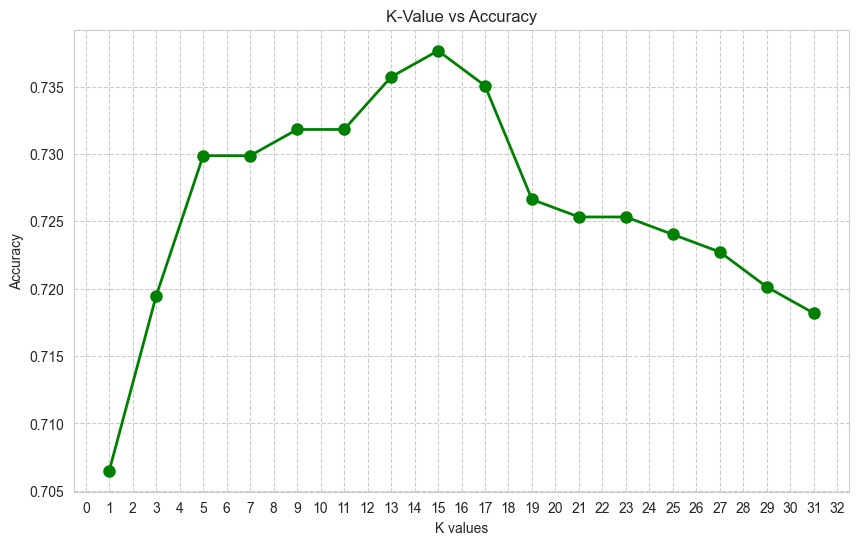

In [39]:
# Plot K-value vs Accuracy 
# Set Seaborn style
sns.set_style("whitegrid")

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line plot using Matplotlib with markers
ax.plot(k, cross_validation_scores, marker='o', markersize=8, linestyle='-', color='Green', linewidth=2)

# Set labels and title
ax.set_xlabel('K values')
ax.set_ylabel('Accuracy')
ax.set_title('K-Value vs Accuracy')

# Set axis units to 1 point
ax.xaxis.set_major_locator(MultipleLocator(1))

# Set additional visual enhancements
ax.grid(True, linestyle='--', alpha=1)

# Show plot
plt.show()

In [40]:
# Find best K-value
best_k = k[np.argmax(cross_validation_scores)]
print("Best Value of K for k-NN Classifier is:", best_k)

Best Value of K for k-NN Classifier is: 15


##### 3.	For the RBF kernel SVM, there are two parameters to be decided: the soft margin penalty term c and the kernel width parameter gamma. Again use 5-fold cross validation on the training set to select the parameter c from the set [0.1, 0.5, 1, 2, 5, 10, 20, 50] and select the parameter gamma from the set [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]. Report the best parameters in terms of classification accuracy. 

In [41]:
# Define candidate values for parameters c and gamma
parameters = {'C': [0.1, 0.5, 1, 2, 5, 10, 20, 50], 'gamma': [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]}

# Perform grid search with 5-fold cross-validation
svm_grid = GridSearchCV(SVC(kernel='rbf'), parameters, cv=5, scoring='accuracy')
svm_grid.fit(x_train, y_train)

# Get best parameters
best_c = svm_grid.best_params_['C']
best_gamma = svm_grid.best_params_['gamma']
print("Best parameters for SVM (RBF kernel): C =", best_c, ", gamma =", best_gamma)


Best parameters for SVM (RBF kernel): C = 10 , gamma = 0.01


##### 4.	Using the chosen parameters from the above parameter selection process for k-NN and SVM, and the default setups for Naïve Bayes classifier and Decision Tree, classify the test set. Repeat each classification method 20 times by varying the split of training-test set as in Step (1). Report the average and standard deviation of classification performance on the test set regarding accuracy, precision, recall, and F1-score. 

In [42]:
# Function to perform classification and return performance metrics
def classify_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

In [43]:

# Initialize classifiers with selected parameters
knn = KNeighborsClassifier(n_neighbors=best_k)
svm = SVC(kernel='rbf', C = best_c, gamma = best_gamma)
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier()

In [44]:

# Perform classification and evaluation 20 times
def Perform_classification(classifier):
    num_trials = 20
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for _ in range(num_trials):
        # Split data into train and test sets
        x_train, x_test, y_train, y_test = train_test_split(normalised_x, y, test_size=0.3, random_state=None)
        
        # Classify and evaluate
        accuracy, precision, recall, f1 = classify_and_evaluate(classifier, x_train, y_train, x_test, y_test)
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)

    # Report average and standard deviation of performance metrics
    print("Average Accuracy of:", mean(accuracy_scores))
    print("Standard Deviation Accuracy:", stdev(accuracy_scores))
    print("Average Precision:", mean(precision_scores))
    print("Standard Deviation Precision:", stdev(precision_scores))
    print("Average Recall:", mean(recall_scores))
    print("Standard Deviation Recall:", stdev(recall_scores))
    print("Average F1-score:", mean(f1_scores))
    print("Standard Deviation F1-score:", stdev(f1_scores))

In [45]:
# KNN
Perform_classification(knn)

Average Accuracy of: 0.7454545454545455
Standard Deviation Accuracy: 0.023062388461276794
Average Precision: 0.9582317038584496
Standard Deviation Precision: 0.017951948079664548
Average Recall: 0.5281739994932426
Standard Deviation Recall: 0.038444546032150424
Average F1-score: 0.6799594992015696
Standard Deviation F1-score: 0.03055886501181418


In [46]:
# SVM Perform classification and evaluation 20 times
Perform_classification(svm)

Average Accuracy of: 0.9056818181818181
Standard Deviation Accuracy: 0.008512642447346968
Average Precision: 0.9229803087200773
Standard Deviation Precision: 0.012422421195910737
Average Recall: 0.8888911185738743
Standard Deviation Recall: 0.015071708266128764
Average F1-score: 0.9055140347602055
Standard Deviation F1-score: 0.009756328843081872


In [47]:
# Naiye Bayes Perform classification and evaluation 20 times
Perform_classification(naive_bayes)

Average Accuracy of: 0.870530303030303
Standard Deviation Accuracy: 0.01231381077168416
Average Precision: 0.8695971015077553
Standard Deviation Precision: 0.01612655811730161
Average Recall: 0.8837044306019265
Standard Deviation Recall: 0.014578520189126608
Average F1-score: 0.8764875415994177
Standard Deviation F1-score: 0.011734367684576799


In [48]:
# Decision Tree Perform classification and evaluation 20 times
Perform_classification(decision_tree)

Average Accuracy of: 0.9343181818181818
Standard Deviation Accuracy: 0.011800737544827626
Average Precision: 0.9394914827870673
Standard Deviation Precision: 0.014165389994089742
Average Recall: 0.9328387152109977
Standard Deviation Recall: 0.016293521724058575
Average F1-score: 0.9360564593071852
Standard Deviation F1-score: 0.011767181761779988


##### 5 Comment on the obtained results. 

# **Analysis**  

### KNN classifier shows a moderate level of accuracy. The high precision suggests that model is likely to predict a positive class correct. The low recall indicates model misses a significant number of actual positive cases. There is a tradeoff between recall and precision. The F1-score is also low , thus it does not capture the complexity of the data.

### SVM with RBF Kernel demonstrates strong performace across all metrices with high accuracy, precision, recall and F1-score. The low standard deviation indicates model is consisten across whole data and chosen parameters are effective.

### Naive Bayes Classifier has strong F1-score. With balanced precision and recall , Naive Bayes looks good for this dataset.

### Decision Tree shows highest accuracy among all the classifiers and has a high F1-score as well; indicating good balance between precision and recall. The low standard deviation suggests that it is stable across different data splits. 